In [1]:
import importlib
import config, campaign
importlib.reload(config)
importlib.reload(campaign)

print('Using classifier: ', config.classifier.__class__.__name__)
print('Using feature selection: ', config.feature_selection)
print('Using feature significance test: ', config.significance_test)
print('imblearn sampling algo:', config.sampling_algo.__class__.__name__)
print('Significance level during RFE', config.alpha)
print('Number of RFE features', config.no_selected_rfe)
print('Which type of model: \n', 'Only campaign: ', config.only_campaign, 
      '; Only non campaign: ', config.only_non_campaign)
print('Selected categorical features:\n', config.selected_categorical_features)
print('Selected oridnal columns:\n', config.campaign_related_features)


Using classifier:  LogisticRegression
Using feature selection:  True
Using feature significance test:  False
imblearn sampling algo: SMOTE
Significance level during RFE 0.1
Number of RFE features 20
Which type of model: 
 Only campaign:  True ; Only non campaign:  False
Selected categorical features:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Selected oridnal columns:
 ['contact', 'month', 'day_of_week']


In [2]:
X, y = campaign.data_prep(config)

In [3]:
# this function returns the best model, the best f1-score etc
clf, score, coefs, X_test, y_test = campaign.analyze(config, X, y)

Before balancing dataset and feature selection
Accuracy on test set: 0.88
Test Set confusion matrix:
    pred_0  pred_1
0    4555      63
1     569     106
Classification Report:
 {'precision': 0.6272189349112426, 'recall': 0.15703703703703703, 'f1-score': 0.2511848341232228, 'support': 675, 'fbeta2': 0.6091607396870555}
Classification report:
 {'0': {'precision': 0.8889539422326308, 'recall': 0.9863577306193158, 'f1-score': 0.9351262574420037, 'support': 4618}, '1': {'precision': 0.6272189349112426, 'recall': 0.15703703703703703, 'f1-score': 0.2511848341232228, 'support': 675, 'fbeta2': 0.6091607396870555}, 'micro avg': {'precision': 0.8805970149253731, 'recall': 0.8805970149253731, 'f1-score': 0.8805970149253731, 'support': 5293}, 'macro avg': {'precision': 0.7580864385719367, 'recall': 0.5716973838281764, 'f1-score': 0.5931555457826132, 'support': 5293}, 'weighted avg': {'precision': 0.8555756822776078, 'recall': 0.8805970149253731, 'f1-score': 0.8479053126582938, 'support': 5293}}


In [4]:
import utils
importlib.reload(utils)

<module 'utils' from '/home/sudiptra/repos/campaign/utils.py'>

Average precision-recall score: 0.42


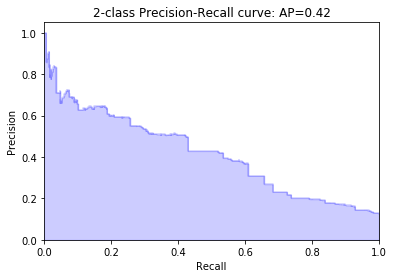

In [5]:
utils.plot_precision_recall_curve(clf, X_test[coefs.keys()], y_test)

   pred_0  pred_1
0    2838    1780
1     177     498


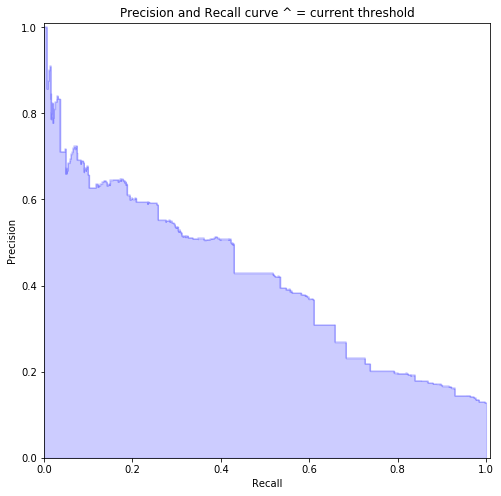

In [6]:
utils.precision_recall_threshold(clf, X_test[coefs.keys()], y_test, t=0.43)

# close to our target FN~10FP

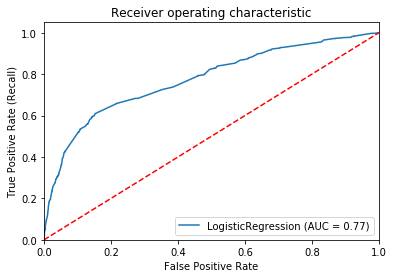

In [7]:
X_test.shape
utils.plot_roc(clf, X_test[coefs.keys()], y_test)

Average precision-recall score: 0.42


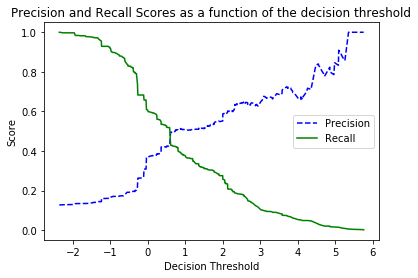

In [8]:
# precision recall threshold curve
utils.plot_precision_recall_vs_threshold(clf, X_test[coefs.keys()], y_test)
